**Author:** Max Aragón <br>
**Affiliation:** INAR | University of Helsinki <br>
**Term:** Summer internship <br>
**Date:** 2023-01-15

<div class="alert alert-block alert-success">
<h2><center>Generation of a cloud base vertical velocity library from lidar and radar</center></h2>

## Load modules

In [1]:
!python --version 

Python 3.9.12


In [1]:
from gliders.plot import *
from gliders.utils import *
from gliders.filter import *
from gliders.updraft import *

## 1. List Cloudnet sites

In [6]:
list_sites('cloudnet')

,id,humanReadableName,type,latitude,longitude,altitude,gaw,dvasId,actrisId,country,countryCode,countrySubdivisionCode
0,bucharest,Bucharest,[cloudnet],44.348,26.029,93,INO,INO,99.0,Romania,RO,None
1,cabauw,Cabauw,[cloudnet],51.968,4.927,-1,CBW,CBW,88.0,Netherlands,NL,None
2,chilbolton,Chilbolton,[cloudnet],51.144,-1.439,85,None,CHI,123.0,United Kingdom,GB,GB-ENG
3,delft,Delft,[cloudnet],51.996,4.379,-4,None,DEL,NaN,Netherlands,NL,None
4,galati,Galați,[cloudnet],45.435,28.037,40,None,GAL,102.0,Romania,RO,None
5,granada,Granada,[cloudnet],37.164,-3.605,680,UGR,GRA,110.0,Spain,ES,None
6,hyytiala,Hyytiälä,[cloudnet],61.844,24.288,174,SMR,SMR,23.0,Finland,FI,None
7,juelich,Jülich,[cloudnet],50.906,6.407,108,JUE,JUE,48.0,Germany,DE,None
8,kenttarova,Kenttärova,[cloudnet],67.988,24.243,342,None,KEN,26.0,Finland,FI,None
9,leipzig,Leipzig,[cloudnet],51.353,12.435,126,LEI,LEI,64.0,Germany,DE,None


In [2]:
# Display the map
IFrame(src='map.html', width=700, height=400)

## 2. Download Cloudnet



##### *Download_cloudnet* function simplifies downloading _classification_ and _categorize_ files from any cloudnet site, while generating 4 directories:


In [3]:
# Download for one site

download_cloudnet(site='hyytiala', start='2014-01-01', end='2022-12-31')

 hyytiala is done!


In [4]:
# Check total number of files

print('Total number of classification files: ' + str(len(os.listdir('Products_hyytiala/Classification'))))
print('Total number of categorize files: ' + str(len(os.listdir('Products_hyytiala/Categorize'))))

Total number of classification files: 1748
Total number of categorize files: 1748


In [5]:
# List some files

print(sorted(os.listdir('Products_hyytiala/Classification'))[:3])
print(sorted(os.listdir('Products_hyytiala/Categorize'))[:3])

['20140202_hyytiala_classification.nc', '20140203_hyytiala_classification.nc', '20140204_hyytiala_classification.nc']
['20140202_hyytiala_categorize.nc', '20140203_hyytiala_categorize.nc', '20140204_hyytiala_categorize.nc']


## 3. Find updraft cases

***

##### *keep_updrafts* generates and finds potentially good updraft cases, returning the following:

1. output 1 = cloud base updraft for the raw data (droplets, ice, drizzle)
2. output 2 = cloud base updraft with ice cloud filtered (droplets, drizzle)
3. output 3 = cloud base updraft with ice cloud and drizzle filtered (droplets)

***

In [6]:
classification_path = 'Products_hyytiala/Classification'
categorize_path = 'Products_hyytiala/Categorize'
updraft_path = 'Products_hyytiala/Updraft'

In [ ]:
keep_updrafts(classification_path, categorize_path, updraft_path)

In [10]:
print('Total number of classification files after processing: ' + str(len(os.listdir('Products_hyytiala/Classification'))))
print('Total number of categorize files after processing: ' + str(len(os.listdir('Products_hyytiala/Categorize'))))

Total number of classification files after processing: 414
Total number of categorize files after processing: 414


In [9]:
# List dates with potentially good updraft cases

print(sorted(os.listdir('Products_hyytiala/Classification'))[:3])

['20140205_hyytiala_classification.nc', '20140206_hyytiala_classification.nc', '20140209_hyytiala_classification.nc']


## 4. Data visualization

***

##### *generate_figure* is a CloudnetPy native function for plotting data.

***

In [11]:
# Location of the files
classification_file = 'Products_hyytiala/Classification/20220827_hyytiala_classification.nc'
categorize_file = 'Products_hyytiala/Categorize/20220827_hyytiala_categorize.nc'

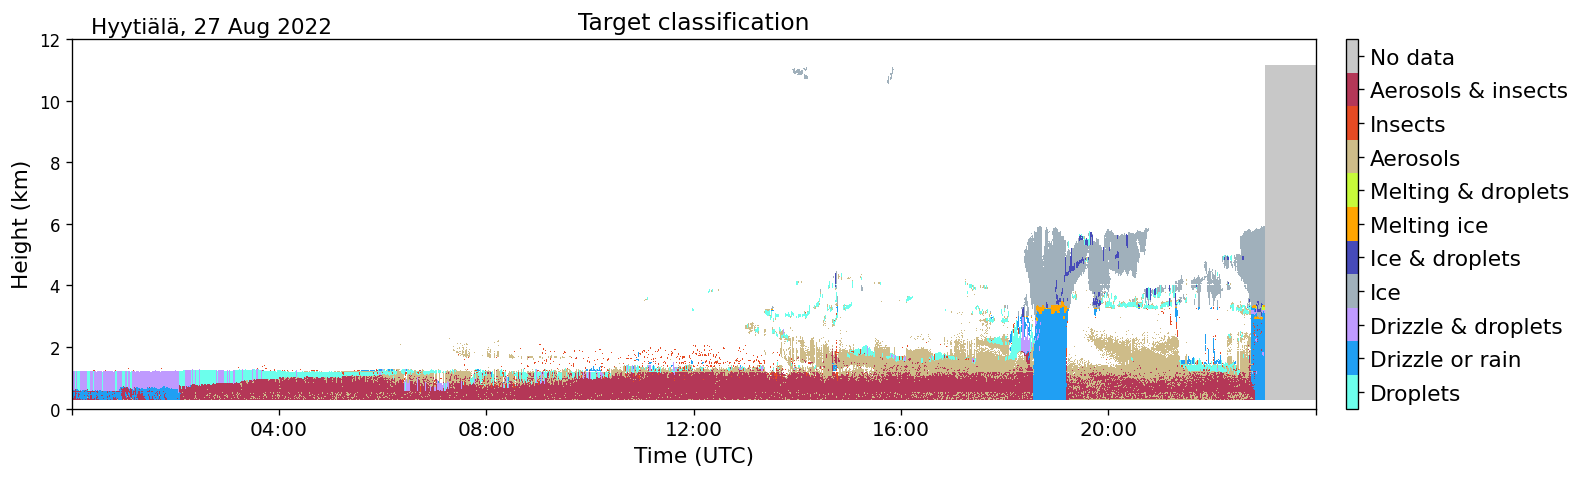

In [12]:
generate_figure(classification_file, ['target_classification'])
plt.show()

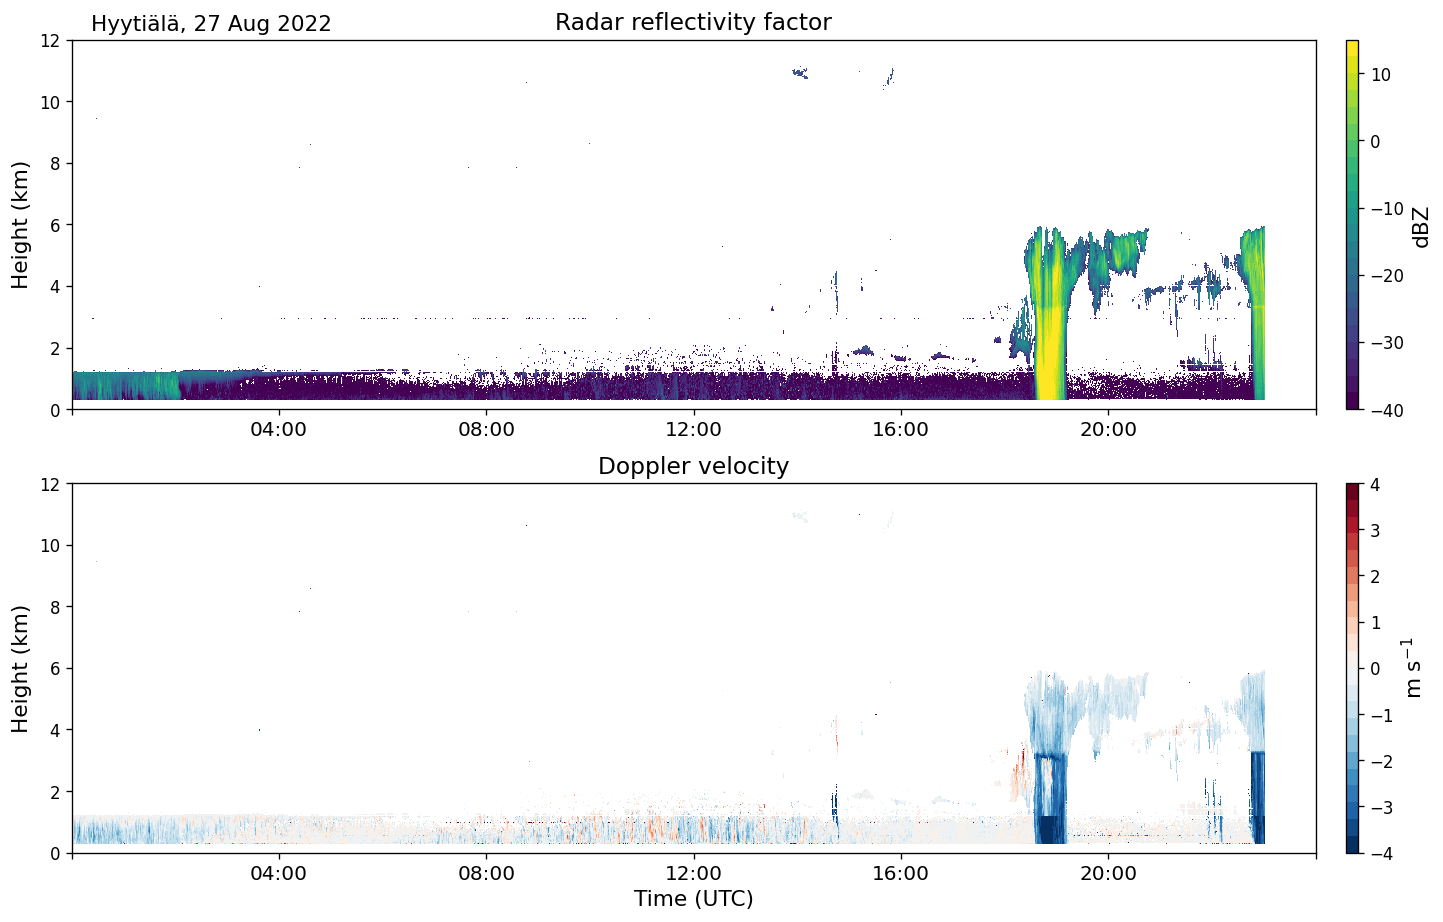

In [13]:
generate_figure(categorize_file, ['Z', 'v'])
plt.show()

***

##### *plot_raw* classifies and visualize data into warm clouds (droplets), ice clouds (ice), and precipitation (drizzle).

***

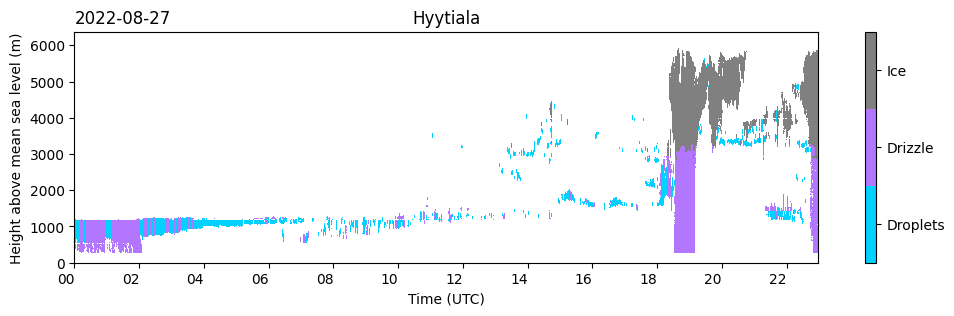

In [14]:
plot_raw(classification_file, categorize_file)

***

##### *plot_cbt* combines model temperatures with cloud observations to visualize cloud temperatures.

***

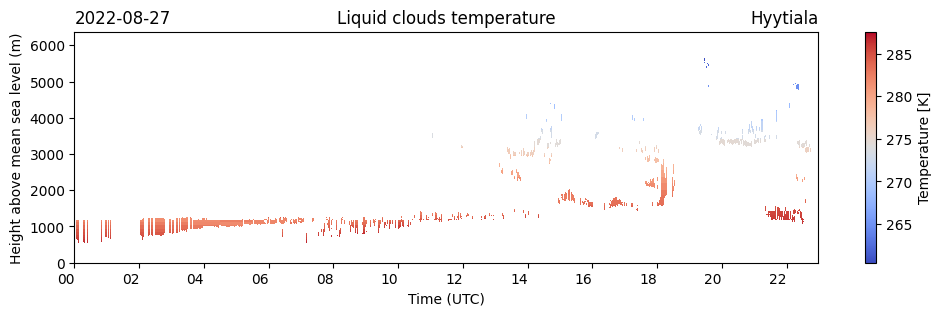

In [15]:
plot_cbt(classification_file, categorize_file)

***

##### *plot_filters* shows raw and processed data.

***

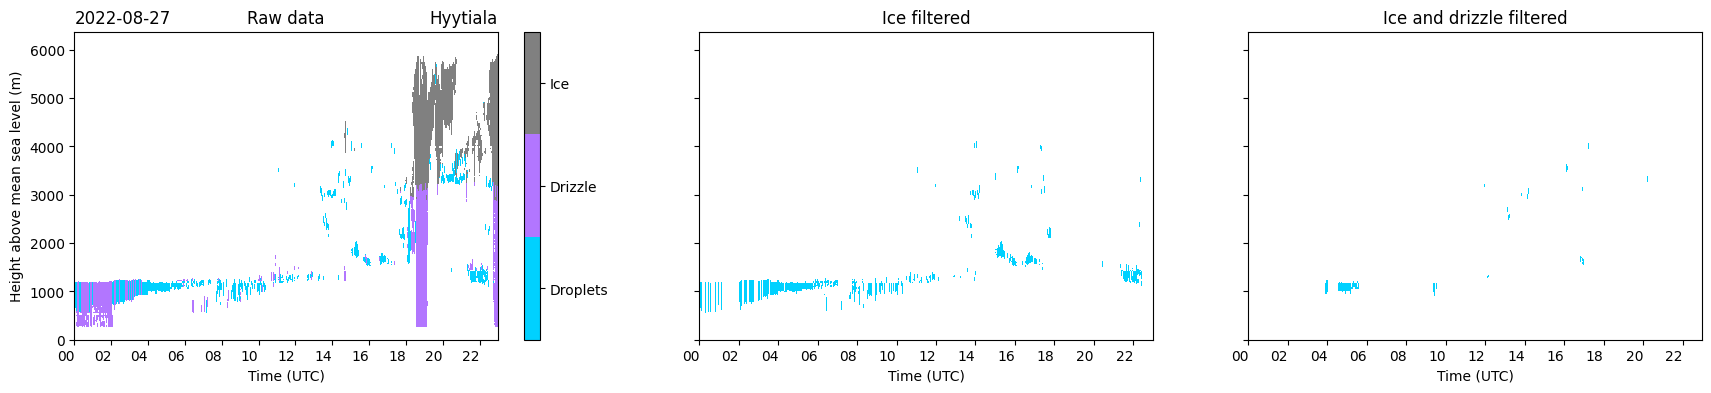

In [16]:
plot_filters(classification_file, categorize_file)

## 5. Visualize cloud base updraft product

In [18]:
# updraft products

print(sorted(os.listdir('Products_hyytiala/Updraft'))[:3])

['output_1_hyytiala', 'output_2_hyytiala', 'output_3_hyytiala']


In [24]:
# files in output 1

print(sorted(os.listdir('Products_hyytiala/Updraft/output_1_hyytiala'))[:3])

['20140205_hyytiala_updraft_1.nc', '20140206_hyytiala_updraft_1.nc', '20140209_hyytiala_updraft_1.nc']


In [25]:
# files in output 2

print(sorted(os.listdir('Products_hyytiala/Updraft/output_2_hyytiala'))[:3])

['20140205_hyytiala_updraft_2.nc', '20140206_hyytiala_updraft_2.nc', '20140209_hyytiala_updraft_2.nc']


In [23]:
# files in output 3

print(sorted(os.listdir('Products_hyytiala/Updraft/output_3_hyytiala'))[:3])

['20140205_hyytiala_updraft_3.nc', '20140206_hyytiala_updraft_3.nc', '20140209_hyytiala_updraft_3.nc']


In [26]:
path = 'Products_hyytiala/Updraft/'

# output 1 (cloud base updraft for the raw data)

updrafts_1 = path + 'output_1_hyytiala/20220827_hyytiala_updraft_1.nc'

# output 2 (cloud base updraft with ice cloud filtered)

updrafts_2 = path + 'output_2_hyytiala/20220827_hyytiala_updraft_2.nc'

# output 3 (cloud base updraft with ice cloud and drizzle filtered)

updrafts_3 = path + 'output_3_hyytiala/20220827_hyytiala_updraft_3.nc'

## 6. Visualize the outputs

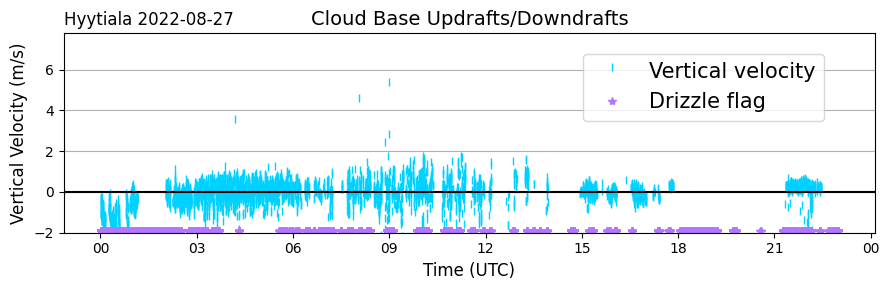

In [27]:
plot_updrafts(classification_file, updrafts_2)

***

*plot_kde* visualizes probability density functions for all the cases derived from the *generate_updraft*. 


***

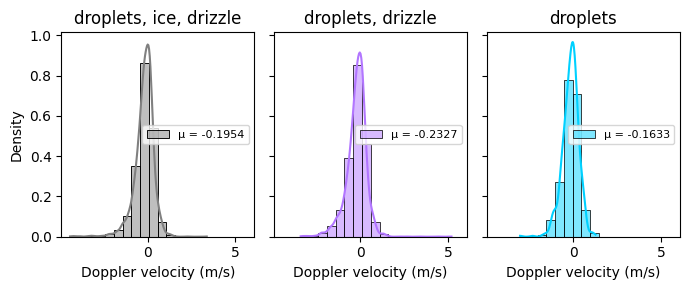

In [28]:
plot_kde(updrafts_1, updrafts_2, updrafts_3)

# Library of promising dates with cloud base vertical velocity data

In [2]:
# Higher score means potentially more relevant since includes more vertical velocites and more positive values.

path = 'Products_hyytiala/Updraft/output_2_hyytiala'

df = generate_library(path); df.head(30)

,date,drafts,mean_v,drafts_normal,mean_v_normal,score
47,20140224,1894,0.1835,1.000000,0.601856,1.601856
128,20220827,1845,-0.2327,0.974047,0.484083,1.458129
306,20140601,1830,-0.2182,0.966102,0.488186,1.454288
102,20140831,1832,-0.2351,0.967161,0.483404,1.450565
174,20140526,1527,0.1069,0.805614,0.580181,1.385795
151,20220727,1688,-0.3343,0.890890,0.455333,1.346222
17,20221013,1505,-0.0147,0.793962,0.545771,1.339733
188,20140811,1575,-0.2491,0.831038,0.479442,1.310480
226,20221028,1523,-0.1770,0.803496,0.499844,1.303340
239,20140716,1454,-0.0845,0.766949,0.526019,1.292969
